In [3]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
network = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(28*28,)),
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [9]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Before training, we need to preprocess the data into the shape that thet network expects and normalizing the pixel values into the range [0, 1].

In [10]:
train_images[0].max()

255

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

In [12]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
train_labels = to_categorical(train_labels)

In [15]:
train_labels[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [16]:
test_labels = to_categorical(test_labels)

In [17]:
history = network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2515 - accuracy: 0.9278
Epoch 2/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1042 - accuracy: 0.9689
Epoch 3/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0697 - accuracy: 0.9790
Epoch 4/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0501 - accuracy: 0.9845
Epoch 5/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0380 - accuracy: 0.9886


In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [19]:
print(f'test_acc: {test_acc:.3f}')

test_acc: 0.978


In [20]:
import matplotlib.pyplot as plt

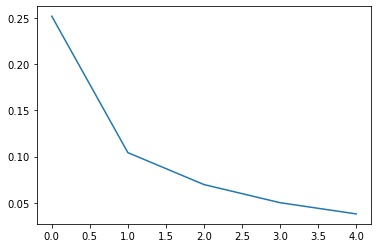

In [21]:
plt.plot(history.history['loss'])

# Element-wise Operations

## Implementation of Naive Relu

In [22]:
def naive_relu(x):
    assert len(x.shape) == 2 # 2D numpy tensor
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [23]:
x = np.random.randint(-10, 10, (3,3))

In [24]:
naive_relu(x)

array([[3, 1, 0],
       [0, 4, 5],
       [0, 3, 0]])

In [25]:
x

array([[ 3,  1, -8],
       [-2,  4,  5],
       [-3,  3, -5]])

In [26]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [27]:
y = np.random.randint(0, 10, (3,3))

In [28]:
y

array([[6, 7, 9],
       [7, 1, 3],
       [2, 1, 6]])

In [29]:
naive_add(x, y)

array([[ 9,  8,  1],
       [ 5,  5,  8],
       [-1,  4,  1]])

In [35]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

The above function performs _broadcasting_ operations, where the 1D vector y is broadcast virtually to the shape of x. You can see that a new 2D tensor is not created. Instead, y is simply added to all the rows of x.

In [31]:
y = np.random.randint(0, 10, (3,))

In [32]:
y

array([8, 7, 3])

In [36]:
naive_add_matrix_and_vector(x, y)

array([[11,  8, -5],
       [ 6, 11,  8],
       [ 5, 10, -2]])

In [34]:
x

array([[ 3,  1, -8],
       [-2,  4,  5],
       [-3,  3, -5]])

## Tensor dot

In [37]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [38]:
x

array([[ 3,  1, -8],
       [-2,  4,  5],
       [-3,  3, -5]])

In [39]:
y

array([8, 7, 3])

In [40]:
naive_vector_dot(x, y)

array([  7.,  27., -18.])

## Full matrix dot product

The below function can be applied to any two vectors or matrices that meet the criteria of the "inside dimesions" matching. The matrix product z has dimensions such that during operations, the row of z matches the row of x and the column of z matches the column of y. There needs to be a third iteration variable, m, that is used to carry out the operation.

In [87]:
def naive_matrix_dot(x, y):
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros((x.shape[0], y.shape[1]))
    for j in range(z.shape[1]):
        for k in range(x.shape[0]):
            a = 0
            for m in range(y.shape[0]):
                a += x[k, m] * y[m, j]
            z[k, j] = a
    return z

In [93]:
x = np.random.randint(-10, 10, (4, 2))

In [94]:
y = np.random.randint(-10, 10, (2, 4))

In [95]:
np.allclose(np.dot(x, y), naive_matrix_dot(x, y))

True

In [96]:
np.dot(x, y)

array([[-23, -19, -12, -14],
       [-77, -73, -24,  -2],
       [ 14,  10,  10,  16],
       [ 52,  50,  15,  -2]])

In [97]:
naive_matrix_dot(x, y)

array([[-23., -19., -12., -14.],
       [-77., -73., -24.,  -2.],
       [ 14.,  10.,  10.,  16.],
       [ 52.,  50.,  15.,  -2.]])